In [1]:
import pandas as pd
import numpy as np
import os 

### Read the input and output of the simulator

##### Define the path to the folder of the outputs and the samples.csv
The outputs here are generated using ModularCirc Library (Tutorial_03)

In [2]:
out_path = '/Users/mfamili/work/ModularCirc/Tutorials/Tutorial_03/Outputs/Out_01'
in_path = '/Users/mfamili/work/ModularCirc/Tutorials/Tutorial_03/samples_Naghavi.csv'

In [3]:
parameters = pd.read_csv(in_path)
len(parameters)

1000

##### Read and process outputs
- Read the outputs and convert them to a list of dictionaries. report if any output files are missing
- convert outputs to a numpy array of (number of samples, number of outputs)

In [4]:
outputs = []
num_sim = 1000
no_sim_result_list = []
# Loop through the expected range of files
for i in range(num_sim):
    filename = f"all_outputs_{i}.csv"
    file_path = os.path.join(out_path, filename)
    
    if os.path.exists(file_path):  # Check if the file exists
        try:
            # Read the DataFrame and append it to the list
            df = pd.read_csv(file_path)
            outputs.append(df)
        except Exception as e:
            print(f"Error reading {file_path}: {e}")
            outputs.append(False)  # Append False if there's an error
    else:
        no_sim_result_list.append(i)
        print(f"File {file_path} doesn't exist")
        outputs.append(False)  # Append False if the file doesn't exist

outs = np.array([df.max().values - df.min().values for df in outputs])
print(np.array(outs).shape)
print(np.array(outs).dtype)


(1000, 17)
float64


##### Update the parameters to drop the parameter sets where the output is missing

In [5]:
updated_parameters = parameters.drop(no_sim_result_list)
updated_parameters= updated_parameters.to_numpy()
updated_parameters.shape

(1000, 33)

In [6]:
preprocessing_methods = [
    {"name": "PCA", "params": {"reduced_dim": 8}},
    {
        "name": "VAE",
        "params": {"reduced_dim": 3, "hidden_layers": [64, 32], "epochs": 100},
    },]
#    {"name": "None", "params": {}},]



#preprocessing_methods = [{"name": "PCA", "params": {"n_components": 8}}]

##### Setup autoemulate 
- here we are choosing to preprocess the outputs in order to reduce the dimentionality


In [7]:
from autoemulate.compare import AutoEmulate
em = AutoEmulate()
em.setup(updated_parameters, outs, models=["gp",'rf'], preprocessing_methods =preprocessing_methods)


/Users/mfamili/work/autoemulate/autoemulate/compare.py:10: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


,Values
Simulation input shape (X),"(1000, 33)"
Simulation output shape (y),"(1000, 17)"
Proportion of data for testing (test_set_size),0.2
Scale input data (scale),True
Scaler (scaler),StandardScaler
Do hyperparameter search (param_search),False
Reduce input dimensionality (reduce_dim),False
Cross validator (cross_validator),KFold
Parallel jobs (n_jobs),1


In [8]:
best_model = em.compare()

Cross-validating:   0%|          | 0/2 [00:00<?, ?it/s]

In [17]:
best_model

{'preprocessing': 'PCA',
 'model': 'GaussianProcess',
 'transformer': PCA(n_components=8)}

In [18]:
em.preprocessing_results.keys()


dict_keys(['PCA', 'VAE'])

In [19]:
em.summarise_cv(model='gp')

,preprocessing,model,short,fold,rmse,r2
0,PCA,GaussianProcess,gp,3,5.629581,0.906414
1,PCA,GaussianProcess,gp,0,4.061678,0.901805
2,PCA,GaussianProcess,gp,4,4.111388,0.901472
3,PCA,GaussianProcess,gp,1,6.452539,0.897481
4,PCA,GaussianProcess,gp,2,5.049916,0.889889
5,VAE,GaussianProcess,gp,3,5.604674,0.907666
6,VAE,GaussianProcess,gp,0,4.150537,0.897396
7,VAE,GaussianProcess,gp,4,4.312733,0.897162
8,VAE,GaussianProcess,gp,1,6.531829,0.892620
9,VAE,GaussianProcess,gp,2,5.160589,0.888795


In [20]:
em.summarise_cv()  # Skip None models by filtering

,preprocessing,model,short,fold,rmse,r2
0,PCA,GaussianProcess,gp,3,5.629581,0.906414
1,PCA,GaussianProcess,gp,0,4.061678,0.901805
2,PCA,GaussianProcess,gp,4,4.111388,0.901472
3,PCA,GaussianProcess,gp,1,6.452539,0.897481
4,PCA,GaussianProcess,gp,2,5.049916,0.889889
5,VAE,GaussianProcess,gp,3,5.604674,0.907666
6,VAE,GaussianProcess,gp,0,4.150537,0.897396
7,VAE,GaussianProcess,gp,4,4.312733,0.897162
8,VAE,GaussianProcess,gp,1,6.531829,0.892620
9,VAE,GaussianProcess,gp,2,5.160589,0.888795


In [13]:
em.evaluate(em.get_model()) 

,model,short,preprocessing,rmse,r2
0,GaussianProcess,gp,PCA,3.6165,0.9091


Pipeline


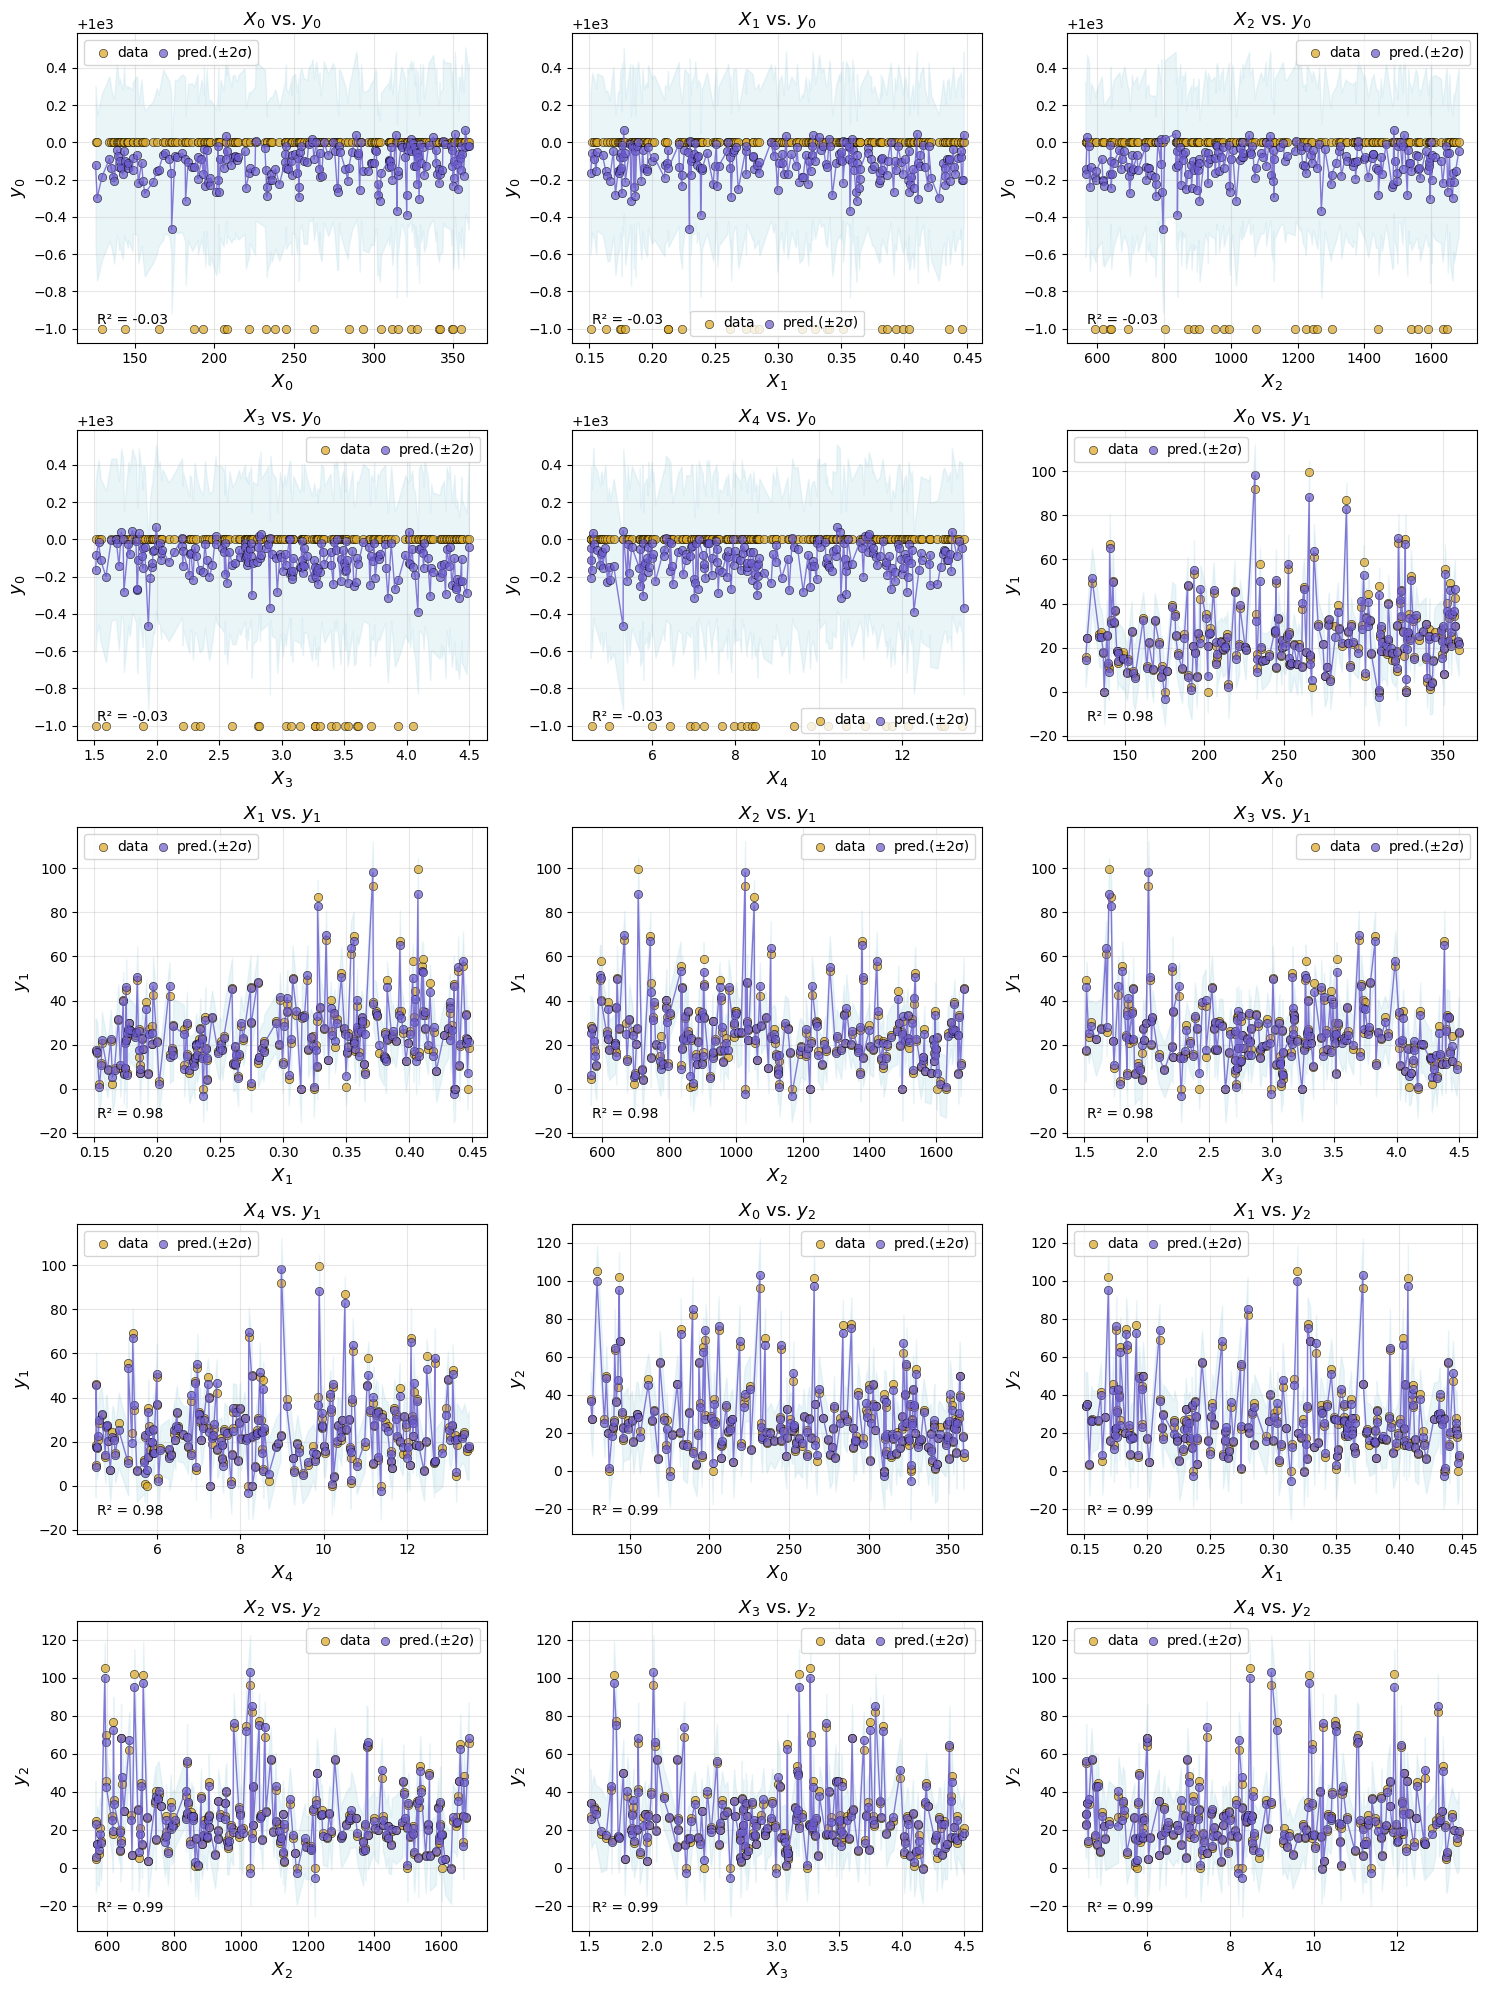

In [14]:
em.plot_eval(em.get_model(), input_index=[0,1,2,3,4], output_index=[0,1,2])

In [15]:
em.plot_cv(style="residual_vs_predicted")

Using best preprocessing method: PCA

Preprocessing Configuration:
Method: PCA
Hyperparameters:
  reduced_dim: 8


KeyError: 'None'

In [24]:
em.get_model().named_steps['model'].model_name

'GaussianProcess'